In [701]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# dtype = torch.float
# #device = torch.device("cpu")
# device = torch.device("cuda:0")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [702]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
#net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [703]:
net.SetIdentityWeights()
net.M[0] += torch.normal( mean=torch.zeros_like(net.M[0]) )/2.
net.M[1] += torch.normal( mean=torch.zeros_like(net.M[1]) )/2.

In [51]:
net.learn = False
net.learn_weights = False
net.learn_biases = False

In [704]:
net.learn = True
net.learn_weights = True
net.learn_biases = True
net.beta = 1.

In [705]:
net.ShowBias()

  b = [0. 0.]
  b = [0. 0.]
  b = [0. 0.]


In [706]:
net.ShowWeights()

  W01 = 
[[1. 0.]
 [0. 1.]]
  M10 = 
[[ 2.1377392  -0.6475469 ]
 [-0.17619334  1.1232864 ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[ 1.5509678   0.31738463]
 [-0.9859887   1.2000096 ]]


In [707]:
net.ShowBias()
net.ShowWeights()

  b = [0. 0.]
  b = [0. 0.]
  b = [0. 0.]
  W01 = 
[[1. 0.]
 [0. 1.]]
  M10 = 
[[ 2.1377392  -0.6475469 ]
 [-0.17619334  1.1232864 ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[ 1.5509678   0.31738463]
 [-0.9859887   1.2000096 ]]


In [708]:
def RandomSample():
    amp = 0.5
    x = (2.*np.random.rand() - 1)*amp
    y = (2.*np.random.rand() - 1)*amp
    return [x, y]

In [724]:
net.layers[0].beta = 1.
net.layers[-1].beta = 0.
net.learning_tau = 2.
epochs = 1000
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 3
start_time = time.time()
for k in range(epochs):
    x = RandomSample()
    net.SetInput(x)
    net.SetExpectation(x)
    net.Run(T, dt=0.01)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 73.82764315605164


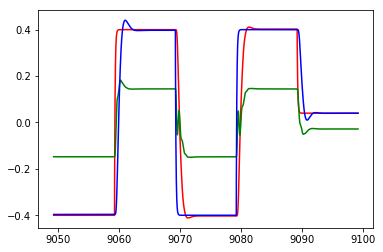

In [677]:
lastn = -5*1000
#lastn = 0
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,0], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,0], 'b');

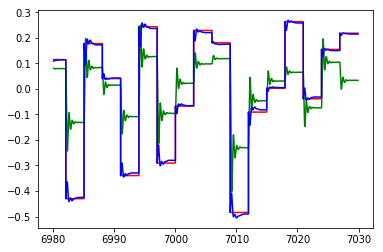

In [453]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,1], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,1], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,1], 'b');

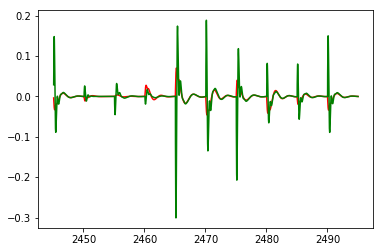

In [426]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].e_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].e_history)[lastn:,0], 'g');
#plt.ylim([-0.01,0.01])

In [664]:
net.ShowBias()
net.ShowWeights()

  b = [0.00234512 0.00356272]
  b = [-0.001847   -0.00149242]
  b = [0. 0.]
  W01 = 
[[ 1.9983159   0.5903125 ]
 [-0.65371585  1.9990057 ]]
  M10 = 
[[ 1.9983159  -0.65371585]
 [ 0.5903125   1.9990057 ]]
  W12 = 
[[ 0.4894201  -0.14381325]
 [ 0.16150665  0.48523822]]
  M21 = 
[[ 0.4894201   0.16150665]
 [-0.14381325  0.48523822]]


In [725]:
net.learn = False
net.learn_weights = False
net.learn_biases = False

In [726]:
v_sample = [0.04, -0.3]
net.SetInput(v_sample)
net.SetExpectation(v_sample)
net.layers[0].beta = 1.
net.layers[-1].beta = 1.
net.ShowState()

Layer 0 (input):
  v = [-0.14385372 -0.03629665]
  e = [ 0.00052784 -0.00030218]
Layer 1:
  v = [-0.07556024 -0.01975127]
  e = [ 0.00110405 -0.00081627]
Layer 2 (expectation):
  v = [-0.14385372 -0.03629665]


In [727]:
net.Run(10., dt=0.01)
net.ShowState()
net.ShowBias()

Layer 0 (input):
  v = [ 0.03999998 -0.2999999 ]
  e = [2.4220135e-08 1.1259538e-07]
Layer 1:
  v = [-0.03168967 -0.18473585]
  e = [4.7807546e-08 3.1245584e-08]
Layer 2 (expectation):
  v = [ 0.03353424 -0.2922705 ]
  b = [0.0095268  0.02127892]
  b = [-0.0052129  -0.00955571]
  b = [0. 0.]


In [728]:
v_sample = [0.4, -0.25]
net.SetInput(v_sample)
net.SetExpectation(v_sample)
net.layers[0].beta = 0.
net.layers[-1].beta = 0.
net.ShowState()

Layer 0 (input):
  v = [ 0.03999998 -0.2999999 ]
  e = [2.4220135e-08 1.1259538e-07]
Layer 1:
  v = [-0.03168967 -0.18473585]
  e = [4.7807546e-08 3.1245584e-08]
Layer 2 (expectation):
  v = [ 0.03353424 -0.2922705 ]


In [729]:
net.Run(10., dt=0.01)
net.ShowState()
net.ShowBias()

Layer 0 (input):
  v = [ 0.40312728 -0.25883204]
  e = [-3.6203488e-08  1.1358095e-07]
Layer 1:
  v = [ 0.13413918 -0.19136056]
  e = [-4.6100482e-08  1.3597304e-07]
Layer 2 (expectation):
  v = [ 0.39999986 -0.25000012]
  b = [0.0095268  0.02127892]
  b = [-0.0052129  -0.00955571]
  b = [0. 0.]


In [740]:
# Test the feedback (generative) performance
beta = 1. # 1 for FF, 0 for FB
net.layers[0].beta = beta
net.layers[-1].beta = beta
inf_layer = -1 if beta==1 else 0
n_trials = 20
x_true = []
x_est = []
for trial in range(n_trials):
    v_sample = RandomSample()
    x_true.append(np.array(v_sample))
    net.SetInput(v_sample)
    net.SetExpectation(v_sample)
    net.Run(10., dt=0.01)
    x_est.append(np.array(net.layers[inf_layer].v))
x_true = np.array(x_true)
x_est = np.array(x_est)

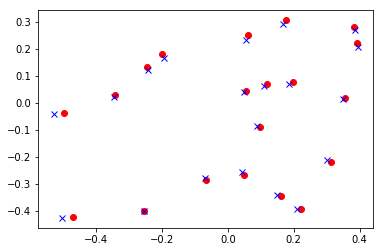

In [741]:
plt.plot(x_true[:,0], x_true[:,1], 'ro', x_est[:,0], x_est[:,1], 'bx');